In [117]:
import pandas as pd
import matplotlib.pyplot as plt
df_GDP=pd.read_csv("GDP.csv")
df_INF=pd.read_csv("INF.csv")
df_UNEMP=pd.read_csv("UNEMP.csv")

In [118]:
# First of all, as i want to perform a 30 year analysis on the 3 datasets (30 years is the best period talking about consistency in these dataset), i need to drop and clean 

df_GDP=df_GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_GDP.set_index('Country Name', inplace=True)
df_INF=df_INF.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_INF.set_index('Country Name', inplace=True)
df_UNEMP=df_UNEMP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_UNEMP.set_index('Country Name', inplace=True)

In [119]:
df_GDP = df_GDP.loc[:, df_GDP.columns.astype(int) > 1993]
df_INF = df_INF.loc[:, df_INF.columns.astype(int) > 1993]
df_UNEMP = df_UNEMP.loc[:, df_UNEMP.columns.astype(int) > 1993]

In [120]:
#Good! Now that we have the same raws and columns for every dataframe, we need to check what is still NaN and drop
df_GDP.isnull().sum()
df_GDP=df_GDP.dropna().copy()
df_INF=df_INF.dropna().copy()

In [121]:
#Now as we want to work on the same countries in every Df, we need to filter them by index
common_index = df_GDP.index.intersection(df_UNEMP.index).intersection(df_INF.index)

# DF filtering 
df_GDP_filtered = df_GDP.loc[common_index]
df_UNEMP_filtered = df_UNEMP.loc[common_index]
df_INF_filtered = df_INF.loc[common_index]

In [122]:
#I want readable dataframes: convert to billions GDP and only 2 decimals. Way better!

df_GDP_filtered.columns = df_GDP_filtered.columns.astype(int)  # Converti i nomi delle colonne in int
df_GDP_filtered.loc[:, 1994:2023] = df_GDP_filtered.loc[:, 1994:2023] / 1_000_000_000
df_GDP_filtered = df_GDP_filtered.round(2)
df_INF_filtered = df_INF_filtered.round(2)
df_UNEMP_filtered = df_UNEMP_filtered.round(2)

In [123]:
df_GDP_filtered

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,243.57,273.43,273.53,288.38,268.83,265.43,287.20,260.99,267.82,355.72,...,978.71,898.28,828.94,973.00,1012.31,1009.72,933.39,1085.75,1191.42,1245.47
Africa Western and Central,134.78,207.18,262.60,275.74,296.15,139.47,142.14,150.06,179.39,207.75,...,897.42,771.77,694.36,687.85,770.49,826.48,789.80,849.31,883.97,799.11
Angola,4.44,5.54,7.53,7.65,6.51,6.15,9.13,8.94,15.29,17.81,...,135.97,90.50,52.76,73.69,79.45,70.90,48.50,66.51,104.40,84.82
Albania,1.88,2.39,3.20,2.26,2.55,3.21,3.48,3.92,4.35,5.61,...,13.23,11.39,11.86,13.02,15.38,15.59,15.24,18.03,19.02,23.55
Arab World,499.88,528.48,570.91,614.60,598.79,665.42,763.41,744.73,746.65,830.08,...,2905.65,2544.70,2500.82,2572.20,2867.35,2899.03,2562.78,2969.24,3609.81,3512.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,7287.24,7639.75,8073.12,8577.55,9062.82,9631.17,10250.95,10581.93,10929.11,11456.45,...,17608.14,18295.02,18804.91,19612.10,20656.52,21539.98,21354.10,23681.17,26006.89,27720.71
St. Vincent and the Grenadines,0.29,0.32,0.33,0.35,0.37,0.39,0.43,0.46,0.49,0.51,...,0.77,0.79,0.81,0.84,0.88,0.91,0.87,0.87,0.97,1.07
World,27941.90,31149.68,31866.90,31760.81,31702.68,32747.09,33855.85,33646.06,34940.17,39181.76,...,80020.34,75472.47,76702.55,81712.04,86884.84,88149.85,85763.01,97848.30,101770.91,106171.67


In [124]:
df_INF_filtered

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,14.85,12.29,9.71,10.25,7.50,7.82,8.60,5.84,8.76,7.45,...,5.37,5.25,6.57,6.40,4.72,4.65,5.41,7.24,10.77,7.13
Africa Western and Central,31.84,10.56,4.91,4.00,4.47,0.37,2.53,4.36,3.19,1.76,...,1.77,2.13,1.49,1.73,1.78,1.98,2.49,3.75,7.95,4.95
Angola,949.79,2666.45,4145.11,219.18,107.28,248.20,325.00,152.56,108.90,98.22,...,7.28,9.36,30.69,29.84,19.63,17.08,22.27,25.75,21.36,13.64
Albania,22.57,7.79,12.73,33.18,20.64,0.39,0.05,3.11,7.77,0.48,...,1.63,1.90,1.28,1.99,2.03,1.41,1.62,2.04,6.73,4.76
Arab World,5.11,6.54,4.68,3.60,3.42,2.67,1.85,1.77,1.83,2.71,...,2.77,1.85,2.68,2.17,2.46,1.09,1.61,2.97,5.09,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,2.61,2.81,2.93,2.34,1.55,2.19,3.38,2.83,1.59,2.27,...,1.62,0.12,1.26,2.13,2.44,1.81,1.23,4.70,8.00,4.12
St. Vincent and the Grenadines,1.01,1.74,4.41,0.44,2.14,1.01,0.17,0.90,1.86,0.21,...,0.19,-1.73,-0.15,2.15,2.32,0.91,-0.63,1.57,5.66,4.56
World,10.25,9.08,6.53,5.55,5.10,3.04,3.43,3.84,2.91,3.03,...,2.35,1.44,1.61,2.25,2.44,2.22,1.91,3.48,7.93,5.64


In [125]:
df_UNEMP_filtered

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,8.14,7.91,7.82,7.78,7.81,7.85,7.79,7.68,7.63,7.59,...,6.95,7.04,7.19,7.35,7.36,7.58,8.19,8.58,7.99,7.81
Africa Western and Central,4.39,4.40,4.34,4.31,4.32,4.51,4.55,4.48,4.29,4.18,...,3.88,4.16,4.16,4.27,4.32,4.40,4.85,4.74,3.66,3.28
Angola,17.40,16.99,16.27,16.17,16.37,16.59,16.68,16.70,16.49,16.50,...,16.41,16.49,16.58,16.61,16.59,16.50,16.69,15.80,14.60,14.54
Albania,20.84,14.61,13.93,16.87,20.04,20.84,19.02,18.57,17.89,16.98,...,18.06,17.19,15.42,13.62,12.30,11.47,11.69,11.47,10.14,10.11
Arab World,13.03,13.52,12.48,12.01,11.96,12.14,12.63,12.51,12.51,12.46,...,11.04,11.15,10.86,11.11,10.66,10.22,11.33,10.89,9.95,9.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,6.12,5.65,5.45,5.00,4.51,4.22,3.99,4.73,5.78,5.99,...,6.17,5.28,4.87,4.36,3.90,3.67,8.06,5.35,3.65,3.64
St. Vincent and the Grenadines,19.97,19.99,20.34,20.12,20.51,20.53,20.79,21.10,20.62,19.97,...,19.25,19.14,19.03,19.01,18.98,19.24,20.64,20.34,19.42,18.57
World,5.80,5.93,5.99,6.02,6.17,6.29,6.12,6.20,6.43,6.50,...,5.97,6.01,5.98,5.91,5.77,5.60,6.61,6.06,5.26,4.92


In [126]:
#Now that we achieved a readable dataframe, the best way to work is convert from wide to long format using melt, and the merge to have a all-in-one dataframe.

df_inflation_long = df_INF_filtered.reset_index().melt(id_vars=['Country Name'], var_name='Year', value_name='Inflation')
df_UNEMP_long = df_UNEMP_filtered.reset_index().melt(id_vars=['Country Name'], var_name='Year', value_name='Unemployment')
df_GDP_long = df_GDP_filtered.reset_index().melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')

for df in [df_GDP_long, df_inflation_long, df_UNEMP_long]:
    df["Year"] = df["Year"].astype(int)

df_merged = df_GDP_long.merge(df_inflation_long, on=["Country Name", "Year"], how="inner") \
                  .merge(df_UNEMP_long, on=["Country Name", "Year"], how="inner")


In [127]:
df_merged

,Country Name,Year,GDP,Inflation,Unemployment
0,Africa Eastern and Southern,1994,243.57,14.85,8.14
1,Africa Western and Central,1994,134.78,31.84,4.39
2,Angola,1994,4.44,949.79,17.40
3,Albania,1994,1.88,22.57,20.84
4,Arab World,1994,499.88,5.11,13.03
...,...,...,...,...,...
5275,United States,2023,27720.71,4.12,3.64
5276,St. Vincent and the Grenadines,2023,1.07,4.56,18.57
5277,World,2023,106171.67,5.64,4.92
5278,South Africa,2023,380.70,6.07,32.10


In [128]:
df_merged.set_index('Country Name')
df_merged.to_csv('Macroeconomics_dataset.csv')
df_merged.to_excel('Macroeconomics_dataset_.xlsx')

#This will be good for PowerBI!

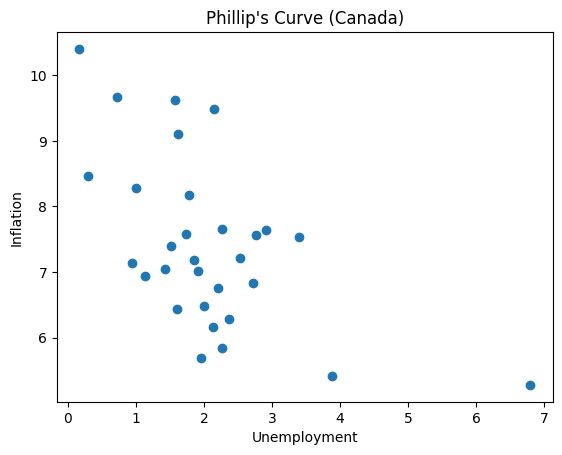

In [129]:
#Event though the best data visualization are on the PowerBI report, let's do some analysis
#For example, let's do an evaluation of the Phllip's curve in some countries

#Canada
plt.title("Phillip's Curve (Canada)")
plt.xlabel("Unemployment")
plt.ylabel("Inflation")
plt.scatter(df_merged['Inflation'].loc[df_merged['Country Name']=='Canada'],df_merged['Unemployment'].loc[df_merged['Country Name']== 'Canada'])

In [130]:
df_merged['Inflation'].loc[df_merged['Country Name']=='Canada'].corr(df_merged['Unemployment'].loc[df_merged['Country Name']== 'Canada'])

# -0.57 is a moderate negative correlation!

np.float64(-0.5707181543413223)

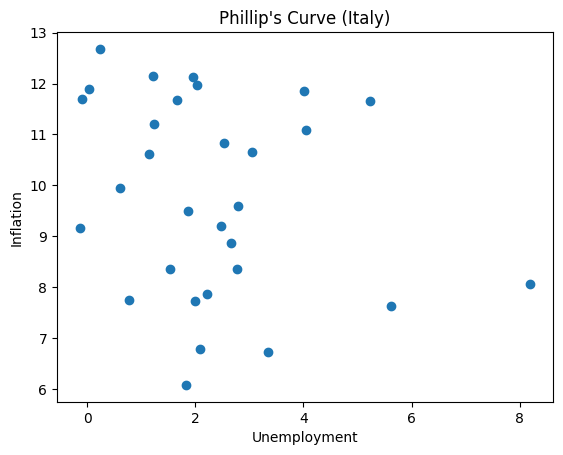

In [131]:
#Italy

plt.title("Phillip's Curve (Italy)")
plt.xlabel("Unemployment")
plt.ylabel("Inflation")
plt.scatter(df_merged['Inflation'].loc[df_merged['Country Name']=='Italy'],df_merged['Unemployment'].loc[df_merged['Country Name']== 'Italy'])

In [132]:
df_merged['Inflation'].loc[df_merged['Country Name']=='Italy'].corr(df_merged['Unemployment'].loc[df_merged['Country Name']== 'Italy'])

# -0,23 is a weaker negative correlation. The difference between Italy and Canada tells that the labour market in Canada is more dynamic 
# and more similar to the theoretical Phillip's curve

np.float64(-0.23426385993580076)

In [133]:
#Let's plot Canadian GDP over the years!

In [134]:
Canadian_df=df_merged[df_merged['Country Name']=='Canada']
Canadian_df


,Country Name,Year,GDP,Inflation,Unemployment
24,Canada,1994,579.94,0.17,10.40
200,Canada,1995,605.96,2.15,9.49
376,Canada,1996,630.61,1.57,9.62
552,Canada,1997,654.99,1.62,9.10
728,Canada,1998,634.00,1.00,8.28
904,Canada,1999,678.41,1.73,7.58
1080,Canada,2000,744.77,2.72,6.83
1256,Canada,2001,738.98,2.53,7.22
1432,Canada,2002,760.65,2.26,7.66
1608,Canada,2003,895.54,2.76,7.57


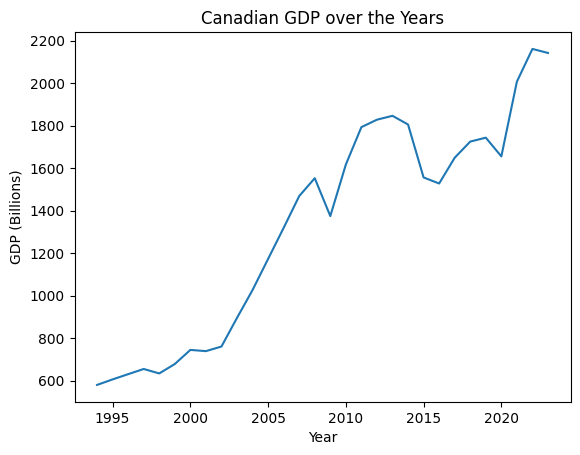

In [135]:

plt.title("Canadian GDP over the Years")
plt.xlabel("Year")
plt.ylabel("GDP (Billions)")
plt.plot(Canadian_df['Year'], Canadian_df['GDP'])


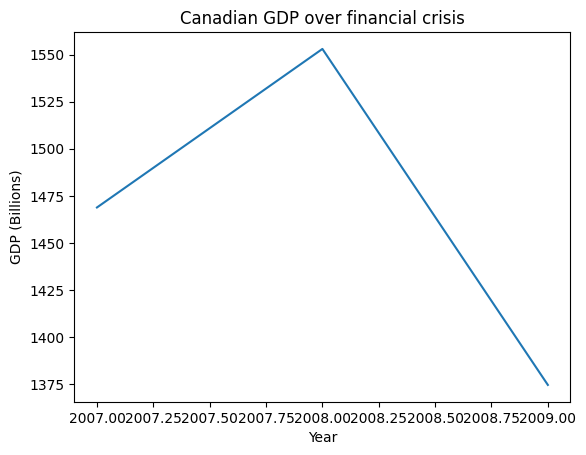

In [161]:
#Let's plot the impact of the great financial crisis

df_2008 = Canadian_df[(Canadian_df['Year'] >= 2007) & (Canadian_df['Year'] <= 2009)]
plt.title("Canadian GDP over financial crisis")
plt.xlabel("Year")
plt.ylabel("GDP (Billions)")
plt.plot(df_2008['Year'], df_2008['GDP'])

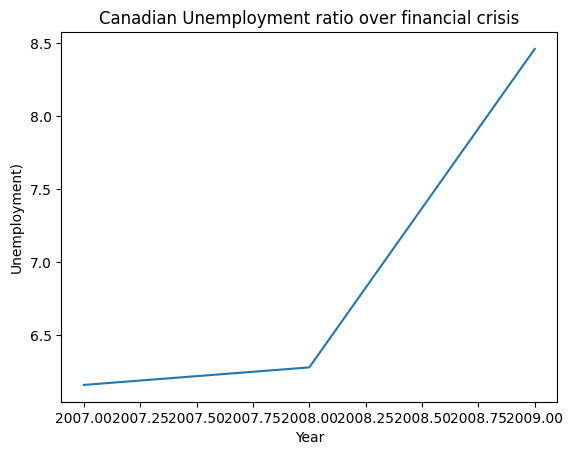

In [162]:
plt.title("Canadian Unemployment ratio over financial crisis")
plt.xlabel("Year")
plt.ylabel("Unemployment)")
plt.plot(df_2008['Year'], df_2008['Unemployment'])

In [163]:
#We can check the negative correlation between GDP and Unemployment ratio
df_2008['GDP'].corr(df_2008['Unemployment'])

# -0.85 is a very strong negative correlation!

np.float64(-0.8589726844156638)